<a href="https://colab.research.google.com/github/aleksejalex/PyPEF_internal/blob/main/ELLS_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELLS - Practical Introduction into Programming with Python

<a href="https://pef.czu.cz/en/"><img src="https://aleksejalex.4fan.cz/ells/temp_banner.jpeg" alt="banner" width="1000"></a>





[GitHub Repository](https://github.com/)

[Project's website](https://kii.pef.czu.cz/ells-2024)

Plan for this lecture:
 - Introduction to computer vision
 - How to employ neural networks in computer vision tasks?

## OpenCV

<a href="https://docs.opencv.org/4.x/index.html"><img src="https://raw.githubusercontent.com/wiki/opencv/opencv/logo/OpenCV_logo_black.svg?sanitize=true" alt="icon" width="100" align="right"></a>
- Library created to work with computer vision:
  - effectively processes and analyzes images and videos
  - implements a wide range of image processing operations (e.g., filtering, edge detection, and transformations)
  - [documentation](https://docs.opencv.org/4.x/index.html)

## TensorFlow

<a href="https://www.tensorflow.org/"><img src="https://www.tensorflow.org/images/tf_logo_social.png" alt="banner" width="400" align="right"></a>
- A powerful library for machine learning and artificial intelligence:
  - provides tools to build and train neural networks
  - supports a variety of tasks such as image and speech recognition, and natural language processing
  - [documentation](https://www.tensorflow.org/learn)


In [ ]:
# Install OpenCV and Matplotlib
!pip install opencv-python-headless matplotlib

In [106]:
# Import required libraries
import cv2
import io
import os
import urllib.request

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.patches as patches

from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import img_to_array
from google.cloud import vision
from google.cloud.vision_v1 import types

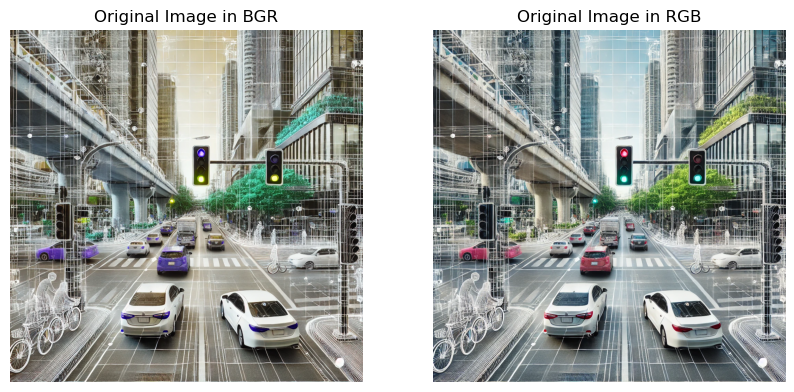

In [4]:
# Define the path to the image
# Ensure the path is correct relative to the location where your script or notebook is running
image_path = 'image.webp'

# Load the image using OpenCV
# cv2.imread reads the image from the specified file path
# The image is loaded in BGR (Blue, Green, Red) color space by default
image = cv2.imread(image_path)

# Check if the image was loaded successfully
# If the image is not loaded (i.e., image is None), it will raise an error with a message
if image is None:
    raise ValueError(f"Image not found or unable to load at path: {image_path}")

# Convert the image from BGR to RGB color space
# OpenCV loads images in BGR format, but Matplotlib expects RGB format
# cv2.cvtColor function is used to convert the color space of the image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Display the original BGR image in the first subplot
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image in BGR')
plt.axis('off')  # Hide the axis for better visualization

# Display the converted RGB image in the second subplot
plt.subplot(1, 2, 2)
plt.imshow(image_rgb)
plt.title('Original Image in RGB')
plt.axis('off')  # Hide the axis for better visualization

# Show the plot with both images
plt.show()

## The RGB Model

- The RGB model is based on three primary colors: Red, Green, and Blue.
- By combining these three colors in various intensities, a wide spectrum of colors can be produced.
- When all three colors are combined at their maximum intensity, the result is white light.
- Conversely, the absence of all three colors (i.e., all intensities set to zero) results in black.
- Each pixel is typically represented by three color channels corresponding to red, green, and blue.
- Each channel has an intensity value, usually ranging from 0 to 255 in 8-bit color depth where 0 indicates no contribution of that color and 255 indicates full intensity.
- A pixel's color is thus represented as a triplet of values (R, G, B).
- For example, (255, 0, 0) represents pure red, (0, 255, 0) represents pure green, (0, 0, 255) represents pure blue, and (255, 255, 255) represents white.

In [7]:
print(image_rgb)

[[[ 56  76  78]
  [ 20  37  43]
  [ 18  32  41]
  ...
  [ 25  34  35]
  [ 32  42  46]
  [ 29  42  46]]

 [[ 42  61  66]
  [ 61  78  85]
  [ 25  39  50]
  ...
  [ 22  30  32]
  [ 41  52  55]
  [ 34  46  51]]

 [[ 29  48  55]
  [100 117 127]
  [ 35  49  65]
  ...
  [ 24  33  34]
  [ 48  59  62]
  [ 43  56  60]]

 ...

 [[ 84  87 111]
  [178 181 205]
  [101 105 124]
  ...
  [106 100 107]
  [249 250 247]
  [185 186 181]]

 [[ 70  72  99]
  [ 79  82 106]
  [ 62  65  87]
  ...
  [ 92  90  91]
  [170 168 171]
  [223 220 225]]

 [[ 81  84 110]
  [ 45  48  72]
  [ 64  67  89]
  ...
  [159 156 157]
  [ 89  83  92]
  [201 195 206]]]


## Convert to Grayscale: Why?

### Reduced Complexity
- **Color Images**: Consist of three color channels (Red, Green, Blue), each contributing to the image's overall complexity.
- **Grayscale Images**: Contain only one channel, representing intensity, which simplifies the data and reduces computational overhead.

### Faster Processing
- **Less Data**: Processing a single channel (grayscale) is faster than processing three channels (RGB), making algorithms run more efficiently.
- **Lower Memory Usage**: Grayscale images use less memory, which is critical when working with large datasets or real-time applications.

### Enhanced Contrast for Feature Detection
- **Edges and Shapes**: Grayscale images emphasize intensity variations, making it easier to detect edges, shapes, and textures.
- **Noise Reduction**: Eliminating color information can reduce noise and artifacts that might be present in individual color channels.

### Better Performance in Certain Algorithms
- **Edge Detection**: Algorithms like Canny edge detection perform better on grayscale images as they rely on intensity gradients.
- **Object Detection**: Techniques such as face detection often perform more reliably on grayscale images.

### Efficient Storage and Transmission
- **Reduced File Size**: Grayscale images require less storage space, which is beneficial for storing large amounts of data.
- **Lower Bandwidth**: Transmitting grayscale images over networks requires less bandwidth compared to color images.

### Compatibility with Traditional Techniques
- **Classical Algorithms**: Many early image processing algorithms were developed for grayscale images due to the computational limits of earlier hardware.
- **Standard Practices**: Grayscale conversion has become a standard preprocessing step for many modern algorithms to maintain compatibility and ensure consistent results.

### Thresholding and Segmentation
- **Binary Thresholding**: Converting to grayscale simplifies binary thresholding, useful in document scanning, medical imaging, and object segmentation.
- **Region of Interest (ROI)**: Identifying and analyzing specific regions within an image is more straightforward in grayscale.

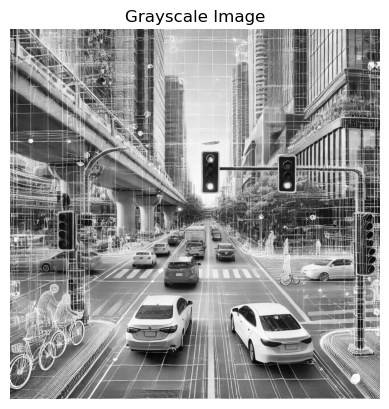

In [10]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

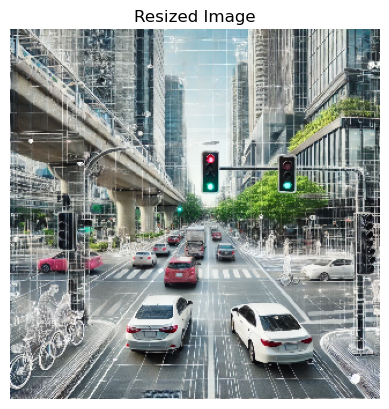

In [65]:
# Resize the image
resized_image = cv2.resize(image_rgb, (320, 320))

# Display the resized image
plt.imshow(resized_image)
plt.title('Resized Image')
plt.axis('off')
plt.show()

# Apply Gaussian Blur to the Image - Why?

## Benefits of Gaussian Blur

### 1. Remove Noise
- **Explanation**: Blurring helps reduce noise and irrelevant details in an image, making it smoother and more homogeneous.
- **Example**: When processing a photograph taken in low light, Gaussian blur can reduce the grainy appearance, resulting in a cleaner image.

### 2. Enhance Features
- **Explanation**: By reducing high-frequency noise, Gaussian blur enhances the underlying structures and features of the image.
- **Example**: In medical imaging, such as MRI scans, blurring can help highlight important anatomical features by smoothing out noise.

### 3. Smooth Edges
- **Explanation**: Blurring can help smooth out the edges, making edge detection algorithms like Canny more effective by reducing the number of false edges.
- **Example**: In object detection, applying Gaussian blur before edge detection can improve the accuracy of identifying object boundaries.

### 4. Simplify Segmentation
- **Explanation**: Blurred images have fewer sharp transitions, which can help segmentation algorithms to better identify regions of interest.
- **Example**: In image segmentation for autonomous vehicles, blurring can help in distinguishing between different parts of the scene, such as roads and sidewalks.

### 5. Visual Appeal
- **Explanation**: Blurring can be used to create visual effects such as bokeh in photography, where the background is blurred to highlight the subject.
- **Example**: Portrait photography often uses Gaussian blur to create a pleasing background blur, emphasizing the subject's face.

### 6. Focus on Main Objects
- **Explanation**: Blurring can help focus on the main objects in the image by reducing the details in the background.
- **Example**: In product photography, applying Gaussian blur to the background can make the product stand out more prominently.

## Steps of the Gaussian Blur

### 1. Gaussian Function
- **Explanation**: The Gaussian function defines the shape and spread of the blur. It determines how much influence a pixel has on its neighbors based on the distance from the center.
- **Formula**: The Gaussian function is given by \( G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}} \), where \( \sigma \) is the standard deviation.

### 2. Kernel Creation
- **Explanation**: The Gaussian kernel is created using the Gaussian function. It is a matrix that represents the weights applied to the neighboring pixels during the convolution process.
- **Example**: A 3x3 Gaussian kernel with \( \sigma = 1 \) might look like this:

  \begin{bmatrix}
  0.0625 & 0.125 & 0.0625 \\
  0.125 & 0.25 & 0.125 \\
  0.0625 & 0.125 & 0.0625
  \end{bmatrix}


### 3. Convolution
- **Explanation**: Convolution involves sliding the Gaussian kernel over the image and computing the weighted sum of the pixel values within the kernel's area.
- **Process**: For each pixel in the image, the value is updated to the sum of the products of the kernel values and the corresponding pixel values in the neighborhood.
- **Result**: The image is blurred, with the degree of blurring determined by the size of the kernel and the standard deviation \( \sigma \).

By understanding and applying these steps, Gaussian blur can be effectively used in various image processing tasks to enhance visual quality and improve algorithmic performance.

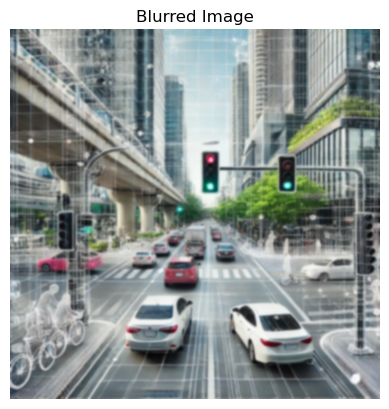

In [12]:
blurred_image = cv2.GaussianBlur(image_rgb, (15, 15), 0)

# Display the blurred image
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')
plt.show()

# How the Canny Function Works for Detecting Edges

The Canny edge detection algorithm is a multi-step process used to identify edges in an image. It is widely used because of its accuracy and ability to detect edges even in noisy images. The steps involved are as follows:

## Steps of the Canny Edge Detection

### 1. Noise Reduction
- **Explanation**: Before detecting edges, the image is smoothed using a Gaussian filter to reduce noise.
- **Mathematics**: The Gaussian filter is applied using convolution with a Gaussian kernel.
  \[
  G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
  \]
  where \(\sigma\) is the standard deviation of the Gaussian distribution.

### 2. Gradient Calculation
- **Explanation**: The gradient of the image intensity is calculated to find the intensity changes. This is done using Sobel operators to get the gradients in the x and y directions.
- **Mathematics**: The gradients are computed as follows:
  \[
  G_x = \frac{\partial I}{\partial x} \quad \text{and} \quad G_y = \frac{\partial I}{\partial y}
  \]
  The gradient magnitude and direction are then calculated:
  \[
  G = \sqrt{G_x^2 + G_y^2} \quad \text{and} \quad \theta = \arctan\left(\frac{G_y}{G_x}\right)
  \]

### 3. Non-Maximum Suppression
- **Explanation**: Non-maximum suppression is applied to thin the edges. It suppresses all the gradient values (sets them to 0) except the local maxima, which represent the edges.
- **Process**: For each pixel, if it is not a local maximum in the direction of the gradient, it is suppressed.

### 4. Double Threshold
- **Explanation**: Two thresholds are applied to determine potential edges. Pixels with gradient values above the high threshold are considered strong edges, while those below the low threshold are suppressed. Pixels between the two thresholds are considered weak edges.
- **Mathematics**: Let \(T_{low}\) and \(T_{high}\) be the low and high thresholds. The classification is:
  \[
  \text{Strong edges: } G > T_{high}
  \]
  \[
  \text{Weak edges: } T_{low} < G \leq T_{high}
  \]
  \[
  \text{Non-edges: } G \leq T_{low}
  \]

### 5. Edge Tracking by Hysteresis
- **Explanation**: The weak edges are analyzed to determine if they are connected to strong edges. Only weak edges connected to strong edges are preserved.
- **Process**: Starting from strong edge pixels, the algorithm traces along the direction of the gradient to include connected weak edge pixels.

## Summary
The Canny edge detection algorithm effectively detects edges by:
1. Reducing noise with a Gaussian filter.
2. Calculating the gradient magnitude and direction.
3. Applying non-maximum suppression to thin the edges.
4. Using double thresholding to classify edge pixels.
5. Tracking edges by hysteresis to retain meaningful edges.

This multi-step approach ensures that the detected edges are accurate and well-defined, even in noisy images.

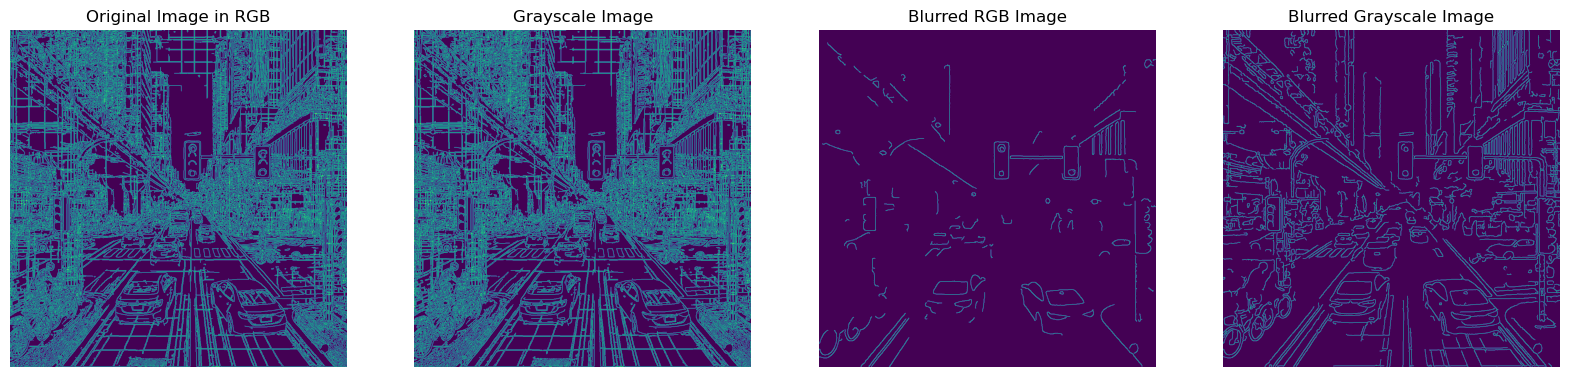

In [13]:
# Apply Gaussian blur to the grayscale image
blurred_image_gray = cv2.GaussianBlur(gray_image, (15, 15), 0)

# Apply Canny edge detection on the original image
edges_rgb = cv2.Canny(image_rgb, 100, 200)

# Apply Canny edge detection on the grayscale image
edges_gray = cv2.Canny(gray_image, 100, 200)

# Apply Canny edge detection on the blurred image
edges_blur = cv2.Canny(blurred_image, 100, 200)

edges_blur_gray = cv2.Canny(blurred_image_gray, 100, 20)

# Create a figure with four subplots
plt.figure(figsize=(20, 10))

# Display the original RGB image in the first subplot
plt.subplot(1, 4, 1)
plt.imshow(edges_rgb)
plt.title('Original Image in RGB')
plt.axis('off')

# Display the grayscale image in the second subplot
plt.subplot(1, 4, 2)
plt.imshow(edges_gray)
plt.title('Grayscale Image')
plt.axis('off')

# Display the blurred RGB image in the third subplot
plt.subplot(1, 4, 3)
plt.imshow(edges_blur)
plt.title('Blurred RGB Image')
plt.axis('off')

# Display the blurred grayscale image in the fourth subplot
plt.subplot(1, 4, 4)
plt.imshow(edges_blur_gray)
plt.title('Blurred Grayscale Image')
plt.axis('off')

# Show the plot with all images
plt.show()

In [14]:
# Get image size (dimensions)
print('height, width, channels: ', image_rgb.shape)
print('height, width, channels: ', gray_image.shape)
print('height, width, channels: ', resized_image.shape)

height, width, channels:  (1024, 1024, 3)
height, width, channels:  (1024, 1024)
height, width, channels:  (400, 400, 3)


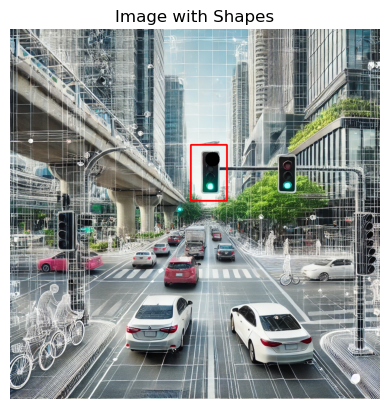

In [15]:
# Draw a rectangle on the image

# Make a copy of the original RGB image to draw shapes on it
image_with_rectangle = image_rgb.copy()

# Draw a rectangle on the copied image
# cv2.rectangle function draws a rectangle on the image
# Parameters:
# - image_with_rectangle: The image on which to draw the rectangle
# - (50, 50): Coordinates of the top-left corner of the rectangle
# - (200, 200): Coordinates of the bottom-right corner of the rectangle
# - (255, 0, 0): Color of the rectangle in RGB format (Blue in this case)
# - 3: Thickness of the rectangle's border in pixels
cv2.rectangle(image_with_rectangle, (500, 320), (600, 475), (255, 0, 0), 3)

# Draw a circle on the image

# cv2.circle function draws a circle on the image
# Parameters:
# - image_with_rectangle: The image on which to draw the circle
# - (300, 300): Coordinates of the center of the circle
# - 50: Radius of the circle in pixels
# - (0, 255, 0): Color of the circle in RGB format (Green in this case)
# - -1: Thickness of the circle's border; a negative value (like -1) means the circle will be filled
cv2.circle(image_with_rectangle, (560, 360), 20, (0, 0, 0), -1)

# Display the image with shapes

# Use plt.imshow to display the image with the drawn shapes
# Parameters:
# - image_with_rectangle: The image to be displayed
plt.imshow(image_with_rectangle)

# Set the title of the plot to 'Image with Shapes'
plt.title('Image with Shapes')

# Hide the axis for a cleaner visualization of the image
plt.axis('off')

# Display the plot
plt.show()

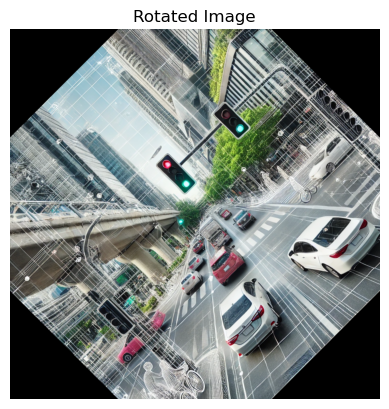

In [16]:
# Rotate the image by 45 degrees
(h, w) = image_rgb.shape[:2]
center = (w // 2, h // 2)
matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image_rgb, matrix, (w, h))

# Display the rotated image
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

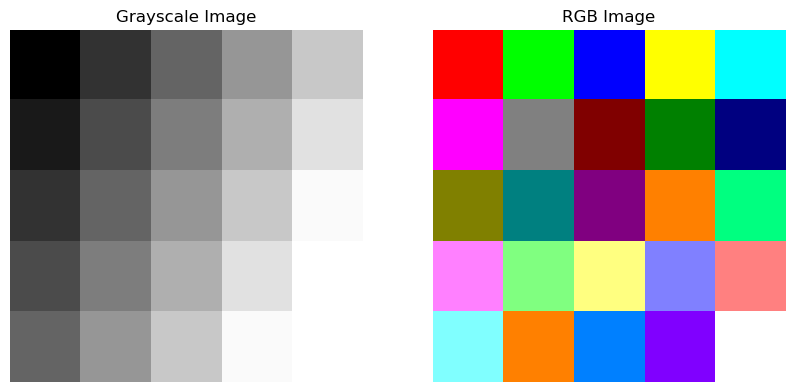

True

In [17]:
# Create a 5x5 grayscale image with varying intensity values
grayscale_image = np.array([
    [0, 50, 100, 150, 200],
    [25, 75, 125, 175, 225],
    [50, 100, 150, 200, 250],
    [75, 125, 175, 225, 255],
    [100, 150, 200, 250, 255]
], dtype=np.uint8)

# Create a 5x5 RGB image with distinct colors
rgb_image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [0, 255, 255]],
    [[255, 0, 255], [128, 128, 128], [128, 0, 0], [0, 128, 0], [0, 0, 128]],
    [[128, 128, 0], [0, 128, 128], [128, 0, 128], [255, 128, 0], [0, 255, 128]],
    [[255, 128, 255], [128, 255, 128], [255, 255, 128], [128, 128, 255], [255, 128, 128]],
    [[128, 255, 255], [255, 128, 0], [0, 128, 255], [128, 0, 255], [255, 255, 255]]
], dtype=np.uint8)

# Plot the grayscale image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Image')
plt.axis('off')

# Plot the RGB image
plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')

plt.show()

# Save the images using OpenCV
cv2.imwrite('grayscale_image.png', grayscale_image)
cv2.imwrite('rgb_image.png', cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR))

Labels detected:
Car: 0.98
Wheel: 0.97
Building: 0.96
Vehicle: 0.95
Daytime: 0.94
Tire: 0.94
Automotive lighting: 0.92
Motor vehicle: 0.92
Infrastructure: 0.90
Automotive design: 0.89


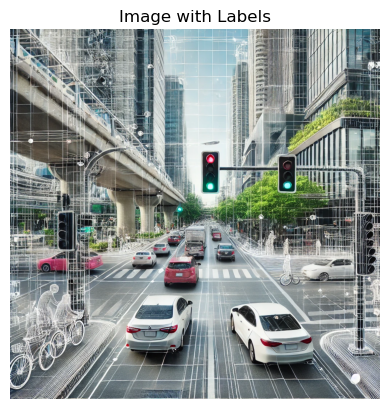

In [18]:
# Image recognition using Google Cloud Vision

# Set up Google Cloud Vision client
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "service_account.json"
client = vision.ImageAnnotatorClient()

# Convert the OpenCV image to bytes
_, encoded_image = cv2.imencode('.jpg', image_rgb)
content = encoded_image.tobytes()

# Use the Vision API to get labels for the image
image = types.Image(content=content)
response = client.label_detection(image=image)
labels = response.label_annotations

# Print out the labels
print("Labels detected:")
for label in labels:
    print(f"{label.description}: {label.score:.2f}")

plt.imshow(image_rgb)
plt.title('Image with Labels')
plt.axis('off')
plt.show()

In [26]:
# Define the model
model = models.Sequential([
    layers.Input(shape=(320, 320, 1)),  # Input layer for 320x320 grayscale images
    layers.Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer
    layers.Flatten(),  # Flatten the feature maps
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer (assuming 10 classes for classification)
])

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 318, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 159, 159, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 157, 157, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 78, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 76, 76, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 369664)            0

In [ ]:
# Normally, you would load your dataset here
num_samples = 100  # Example number of samples
x_train = np.random.rand(num_samples, 320, 320, 1).astype('float32')  # Random grayscale images
y_train = np.random.randint(10, size=(num_samples,))  # Random labels (0-9)

# Train the model
model.fit(x_train, y_train, epochs=5)

In [68]:
# Image recognition using convolutional neural network
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# Load the pre-trained model from TensorFlow Hub
model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")
# Apply image detector on a single image.
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector = hub.load(module_handle).signatures["default"]


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [69]:
ssd_tensor = np.array(resized_image)/255.0
ssd_tensor = ssd_tensor[np.newaxis, ...]
ssd_tensor.shape

(1, 320, 320, 3)

In [134]:
# Make a prediction
detections = model(ssd_tensor)

# Extract the detection boxes, classes, and scores
boxes = detections['detection_boxes'].numpy()[0]
classes = detections['detection_classes'].numpy()
scores = detections['detection_scores'].numpy()[0]

# Print the number of detections and scores to debug
print(f"Number of detections: {len(boxes)}")
print(f"Scores: {scores}")
print(f"Classes: {classes}")

Number of detections: 100
Scores: [0.29331657 0.27046224 0.2325359  0.20748301 0.17589366 0.17032325
 0.15982062 0.15725605 0.15122014 0.14739335 0.14684147 0.14408076
 0.1416563  0.14073451 0.13634863 0.13154879 0.12979046 0.12916093
 0.12540886 0.11600643 0.11147512 0.11067937 0.11015113 0.11009388
 0.10962869 0.1091474  0.10749474 0.106144   0.10612235 0.10370334
 0.10349252 0.10314278 0.10270252 0.1009955  0.09999149 0.09581887
 0.09371447 0.09154795 0.09040052 0.09008471 0.08990094 0.08940352
 0.0883529  0.08733896 0.08417033 0.08316289 0.08221639 0.08079967
 0.08013949 0.07993933 0.07882152 0.07877959 0.07786256 0.07711969
 0.0766809  0.07636662 0.07629233 0.07434496 0.07433061 0.07422407
 0.07400849 0.07382008 0.07361633 0.07352378 0.07242412 0.07221504
 0.07171668 0.0713943  0.07123124 0.07028764 0.07025271 0.07003371
 0.06972963 0.0690001  0.06864757 0.06844405 0.06790448 0.06765123
 0.06528129 0.06496824 0.06434351 0.0643428  0.06350046 0.06250743
 0.06231282 0.06193138 0.061

In [151]:
# Set a confidence threshold (e.g., 0.5)
confidence_threshold = 0.9

# Iterate through detections and draw rectangles for class number 1
for i in range(len(boxes)):
    if classes[0][i] == 1 and scores[i] >= confidence_threshold:
        # Get the bounding box coordinates
        y_min, x_min, y_max, x_max = boxes[i]
        
        # Convert normalized coordinates to image coordinates
        h, w, _ = image.shape
        x_min = int(x_min * w)
        x_max = int(x_max * w)
        y_min = int(y_min * h)
        y_max = int(y_max * h)
        
        # Draw a rectangle around the detected object
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        cv2.putText(image, f'Class: 72', (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

In [152]:
# Save the image with drawn rectangles
output_image_path = 'detections_output.jpg'
cv2.imwrite(output_image_path, image)

print(f"Output image saved to {output_image_path}")

Output image saved to detections_output.jpg


In [77]:
rcnn_tensor = tf.image.convert_image_dtype(image_rgb, tf.float32)[tf.newaxis, ...]
prediction = detector(rcnn_tensor)

In [124]:
# Extract the detection boxes, classes, and scores using the correct keys
boxes = prediction['detection_boxes'].numpy()
classes = prediction['detection_class_labels'].numpy()
scores = prediction['detection_scores'].numpy()

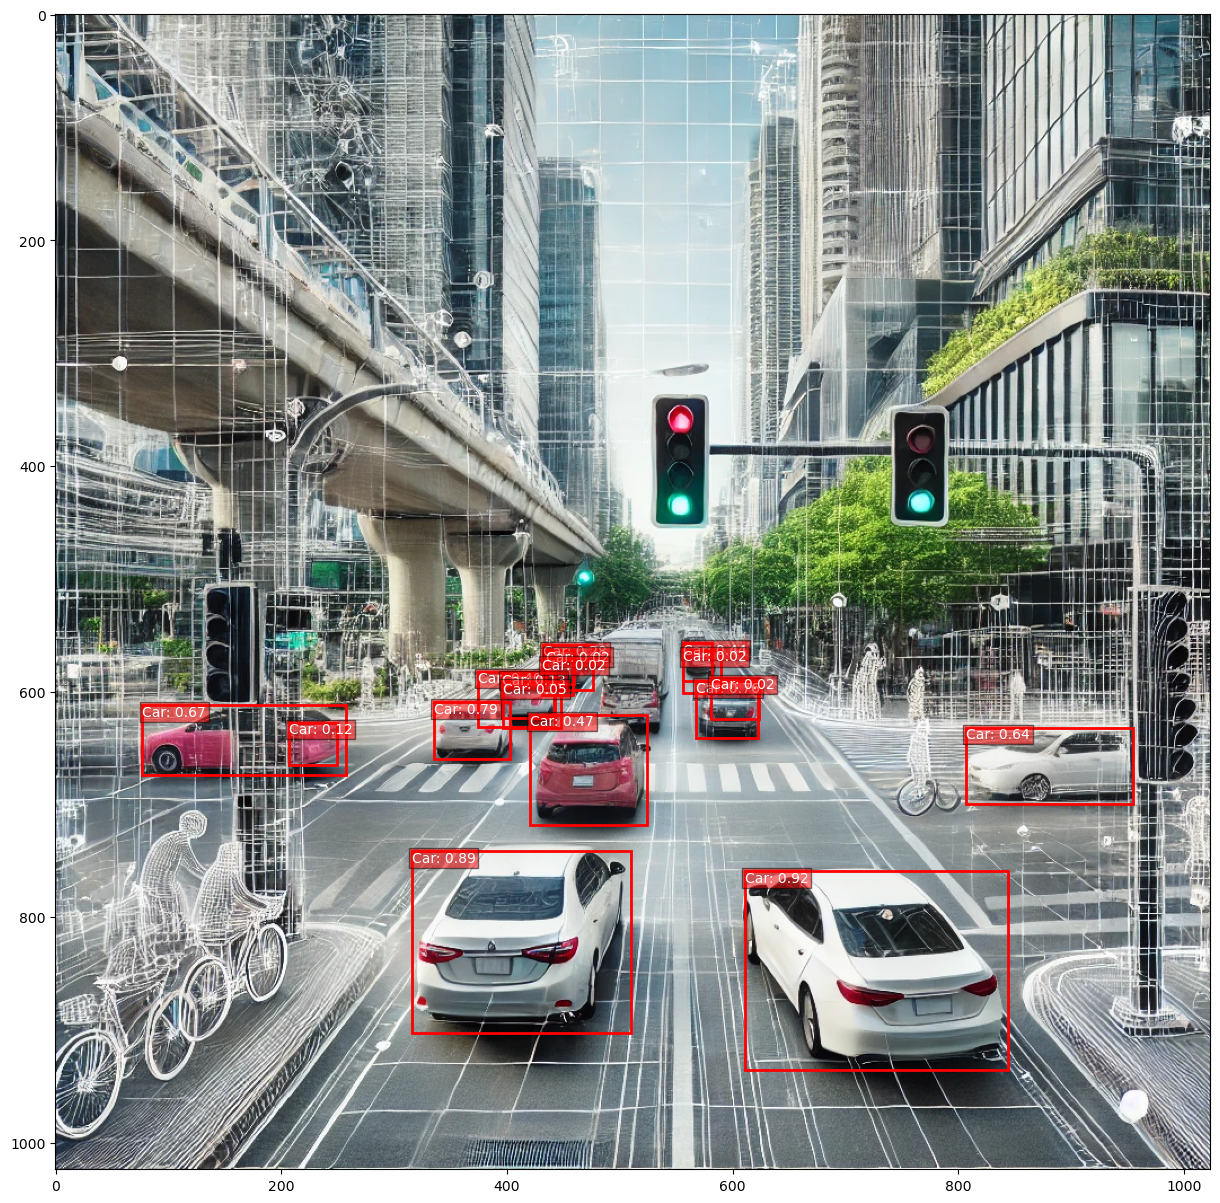

In [129]:
# Define the Open Images class labels for car
CAR_CLASS_LABELS = [571]  # Example labels, need to verify from Open Images label map

# Filter detections for cars
car_indices = [i for i, cls in enumerate(classes) if cls in CAR_CLASS_LABELS]

# Create a plot to display the image
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.imshow(image_rgb)

# Add bounding boxes to the plot for each detected car
for i in car_indices:
    ymin, xmin, ymax, xmax = boxes[i]
    (left, right, top, bottom) = (xmin * image.shape[1], xmax * image.shape[1],
                                  ymin * image.shape[0], ymax * image.shape[0])
    rect = patches.Rectangle((left, top), right - left, bottom - top,
                             linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(left, top, f'Car: {scores[i]:.2f}', color='white', verticalalignment='top',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 2})

plt.show()

## Summary

In this notebook we learnt following:

1. **Introduction to Computer Vision**: 
   - Basic understanding of computer vision and its applications.

2. **Libraries**: 
   - Utilized OpenCV for image processing.
   - Used TensorFlow for building and training neural networks.

3. **Installation and Importation**: 
   - Installed necessary libraries like OpenCV and Matplotlib.
   - Imported various essential libraries for image processing and neural network tasks.

4. **Practical Implementation**: 
   - Applied neural networks to computer vision tasks.
   - Demonstrated how to process and analyze images and videos.


## Additional sources (where to seek for information):

#### Alternative libraries for Image Processing
- **scikit-image**: A collection of algorithms for image processing. [Documentation](https://scikit-image.org/docs/stable/)
- **Pillow**: The Python Imaging Library (PIL) adds image processing capabilities to your Python interpreter. [Documentation](https://pillow.readthedocs.io/en/stable/)
- **SimpleCV**: An open-source framework for building computer vision applications. [Documentation](http://simplecv.org/)

#### Theoretical Background
- **Digital Image Processing by Rafael C. Gonzalez and Richard E. Woods**: A comprehensive book on image processing techniques.
- **Computer Vision: Algorithms and Applications by Richard Szeliski**: A detailed textbook on computer vision algorithms and their applications. [PDF](http://szeliski.org/Book/)
- **OpenCV Documentation**: Official documentation for the OpenCV library. [OpenCV Documentation](https://docs.opencv.org/4.x/)
- **Deep Learning for Computer Vision with Python by Adrian Rosebrock**: A practical guide to applying deep learning techniques to computer vision tasks. [Website](https://www.pyimagesearch.com/deep-learning-computer-vision-python-book/)
``` &#8203;:citation[oaicite:0]{index=0}&#8203;


<div style="font-style: italic; font-size: 14px;">
    <p>This material was prepared by Department of Information Engineering (<a href="https://www.pef.czu.cz/en">PEF ČZU</a>) exclusively for purposes of ELLS summer school "Practical Introduction into Programming with Python". Any distribution or reproduction of this material, in whole or in part, without prior written consent of the authors is prohibited.</p>
    <p>This material is shared under the <b>Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International Public License</b>, <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link</a>.</p>
</div>
